In [10]:
using Images,PyPlot

In [25]:
"""
Complete routine. It also contains a DFT version that speeds up calculation by 3-4 times. Floating points arithmetic seems to bug out on 
certain systems though (especcially within Jupyter notebook - ?!)

# Arguments
* `GoL::Array{Bool,2}`: initial state of the grid
* `runs`: number of generations to calculate
* `sleepTime`: the number of seconds to wait between two succeessive frames
* `safeToDisk`: if True, safe images in the 'GoLpics' folder. VERY SLOW!
* `showOnConsole`: if True, use Python image to show the world. DOES NOT WORK IN JUPYTER
+ `unsafe`: Use 2D discrete fast fourier transform. Seems to bug with some processors.
"""
function runGoL(GoL=nothing; runs=100, sleepTime=0.01, safeToDisk=false, showOnConsole=true, unsafe=false)
    if unsafe
        Mfilt = [1.0 for x in 1:3, y in 1:3] # DFT works on floating points convolution
    else
        Mfilt = [true true  true; true  false  true; true true true]
    end
    
    if GoL == nothing
        if unsafe
            GoL = rand([0.0, 1.0], 500, 500)
        else
            GoL = rand(Bool,500,500)
        end
    end
    
    plt[:axis]("off")
    im = plt[:imshow](GoL, interpolation="none")
    for i_gen = 1:runs
        if unsafe
            # NOTE: imfilter seems to throw "unprecise operation errors" on some systems. Seems to be an internal problem :(
            convGoL = imfilter(GoL, Mfilt, "circular") # much, much faster! And circular :)
            lives2 = convGoL .== 2.0
            lives3 = convGoL .== 3.0

            twoLiveNeig =    ((GoL.==1.0) & lives2) 
            GoL = twoLiveNeig | lives3
        else
            convGoL = conv2(GoL, Mfilt)
            lives2 = convGoL .== 2
            lives3 = convGoL .== 3

            twoLiveNeig = (GoL & lives2[2:end-1,2:end-1]) 
            GoL = twoLiveNeig | lives3[2:end-1,2:end-1]
        end
        
        if safeToDisk
            imgplot = imshow(GoL, interpolation="none")
            savefig("GoLpics/gen$i_gen.png")
        end
        
        if showOnConsole
            im[:set_data](GoL)
            plt[:draw]()
            sleep(sleepTime)
        end
    end
end

runGoL (generic function with 2 methods)

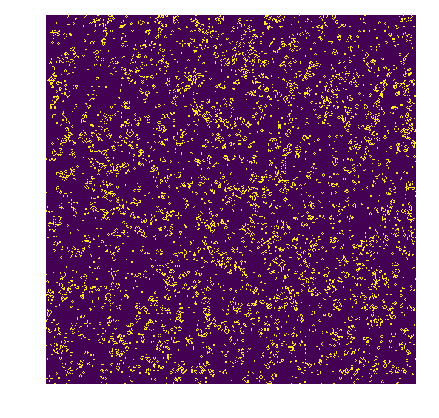

In [27]:
# start the whole thing
runGoL(nothing, unsafe=false)